# Devanagari Character Recognition

In [1]:
import os
import pathlib
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.5.0'

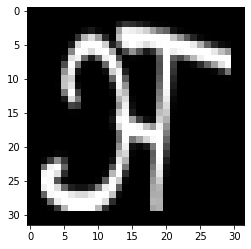

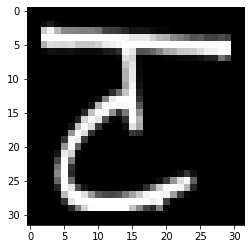

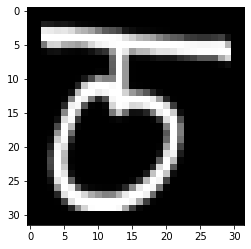

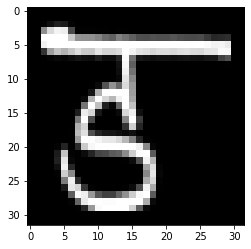

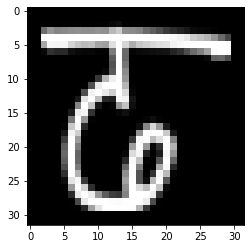

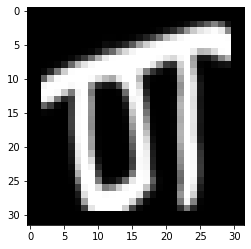

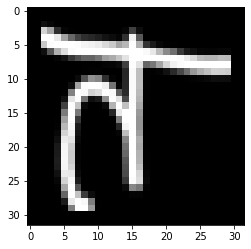

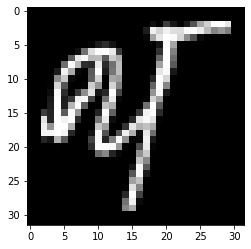

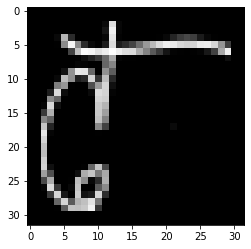

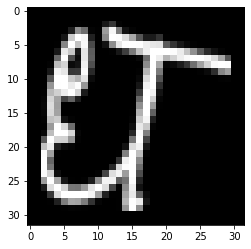

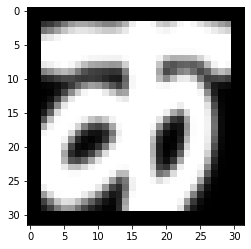

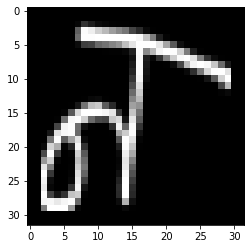

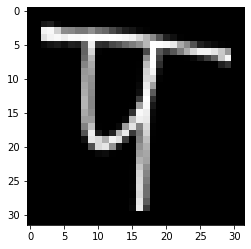

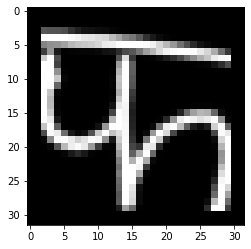

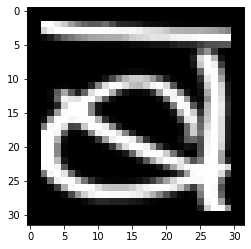

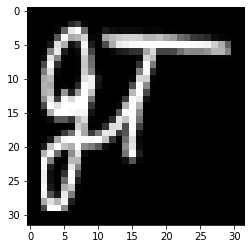

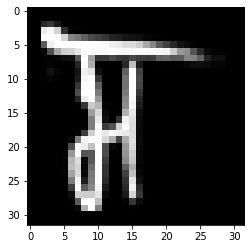

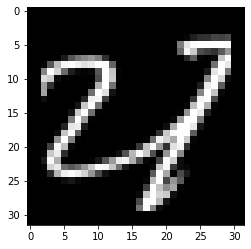

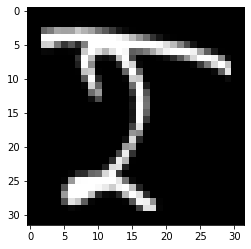

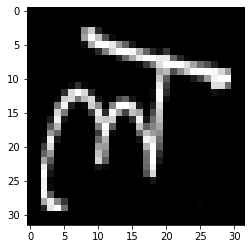

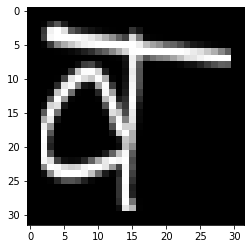

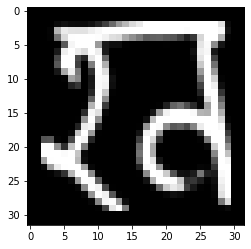

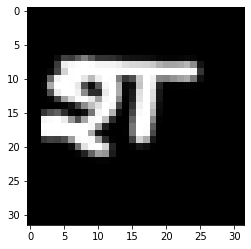

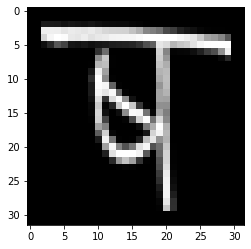

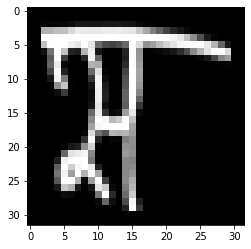

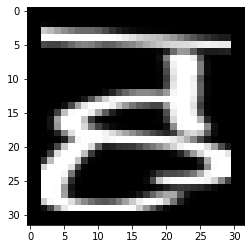

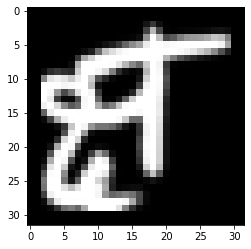

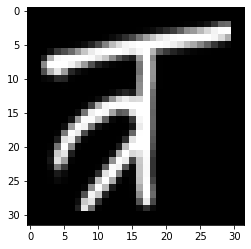

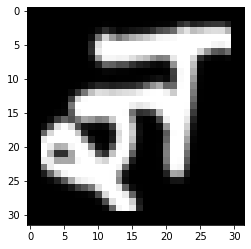

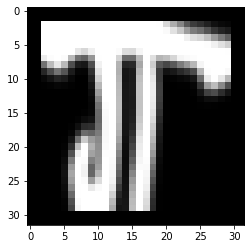

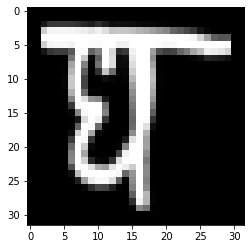

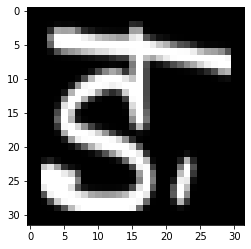

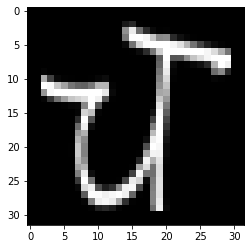

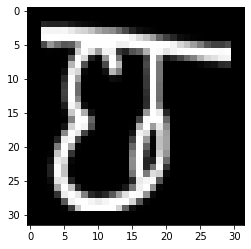

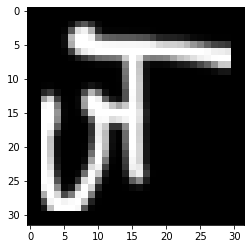

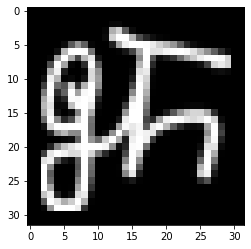

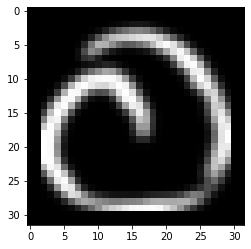

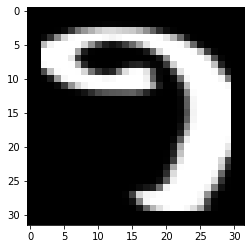

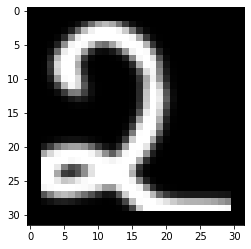

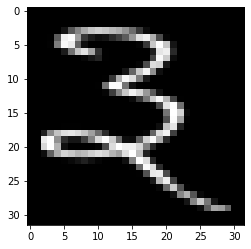

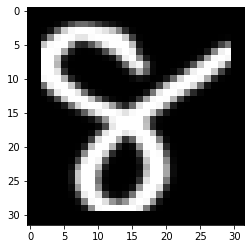

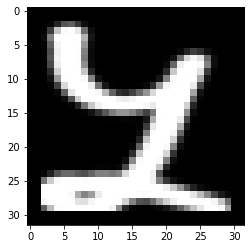

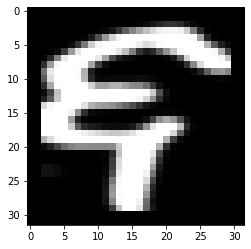

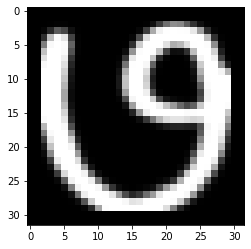

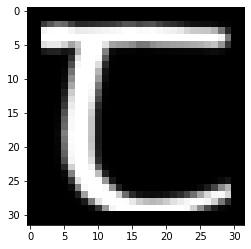

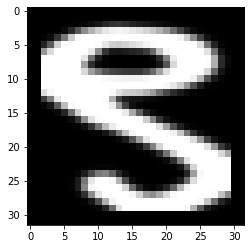

In [2]:
path ='dataset/train/'
for category in os.listdir(path):
    for f_name in os.listdir(path+category)[:1]:
        img = cv.imread(path+category+'/'+f_name)
        plt.imshow(img)
        plt.show()

In [3]:
batch_size = 32
img_height = 32
img_width = 32

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/test',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 78200 files belonging to 46 classes.
Using 62560 files for training.
Found 78200 files belonging to 46 classes.
Using 15640 files for validation.
Found 13800 files belonging to 46 classes.


In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
num_classes=46
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [8]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
1955/1955 [==============================] - 91s 43ms/step - loss: 0.4387 - accuracy: 0.8742 - val_loss: 0.1453 - val_accuracy: 0.9556
Epoch 2/10
1955/1955 [==============================] - 78s 40ms/step - loss: 0.1057 - accuracy: 0.9662 - val_loss: 0.1265 - val_accuracy: 0.9611
Epoch 3/10
1955/1955 [==============================] - 77s 40ms/step - loss: 0.0681 - accuracy: 0.9788 - val_loss: 0.0865 - val_accuracy: 0.9740
Epoch 4/10
1955/1955 [==============================] - 77s 39ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0854 - val_accuracy: 0.9746
Epoch 5/10
1955/1955 [==============================] - 77s 39ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0949 - val_accuracy: 0.9731
Epoch 6/10
1955/1955 [==============================] - 76s 39ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0987 - val_accuracy: 0.9748
Epoch 7/10
1955/1955 [==============================] - 76s 39ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.0874 -

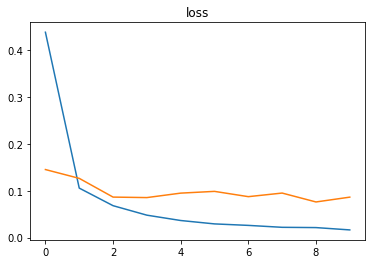

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.show()

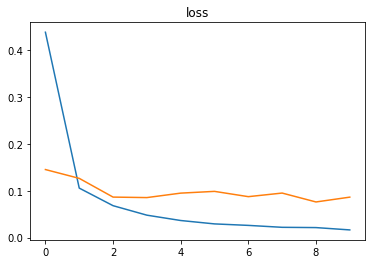

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.show()

In [11]:
model.evaluate(test_ds)

432/432 [==============================] - 8s 19ms/step - loss: 0.0808 - accuracy: 0.9823


[0.08075765520334244, 0.9823188185691833]

In [12]:
model.save('devanagari_char_recognition.h5')